In [135]:
from IMLearn.utils import split_train_test
from IMLearn.learners.regressors import LinearRegression

from typing import NoReturn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import os

In [113]:
filename = f"C:/Users/t8764442/PycharmProjects/IML.HUJI/datasets/house_prices.csv"
df = pd.read_csv(filename)
df = df.drop(["id", "date","lat","long"],axis=1)
lastBuiltCol = pd.DataFrame(np.maximum(df["yr_built"].to_numpy(),df["yr_renovated"].to_numpy()),columns=["yr_touched"])
df = df.drop(["yr_built","yr_renovated"],axis=1).join(lastBuiltCol)
df = pd.get_dummies(df,columns=["zipcode"])
df = df.dropna()
df = df[(df >= 0).all(1)]
df = df.drop(df.index[df['bedrooms'] > 20])
y = pd.DataFrame(df["price"])
X = df.drop(["price"], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146.0,zipcode_98148.0,zipcode_98155.0,zipcode_98166.0,zipcode_98168.0,zipcode_98177.0,zipcode_98178.0,zipcode_98188.0,zipcode_98198.0,zipcode_98199.0
0,3,1.00,1180,5650,1.0,0,0.0,3.0,7.0,1180.0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0.0,3.0,7.0,2170.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0.0,3.0,6.0,770.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0.0,5.0,7.0,1050.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0.0,3.0,8.0,1680.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,3,2.50,1530,1131,3.0,0,0.0,3.0,8.0,1530.0,...,0,0,0,0,0,0,0,0,0,0
21612,4,2.50,2310,5813,2.0,0,0.0,3.0,8.0,2310.0,...,1,0,0,0,0,0,0,0,0,0
21613,2,0.75,1020,1350,2.0,0,0.0,3.0,7.0,1020.0,...,0,0,0,0,0,0,0,0,0,0
21614,3,2.50,1600,2388,2.0,0,0.0,3.0,8.0,1600.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
output_path = "feat_eval"
std_y = np.std(y)
dirname = os.path.dirname(__file__)
filename = os.path.join(dirname, output_path)
for name, values in X.iteritems():
   pc = float(np.cov(values,y.T)[0][1]/(np.std(values)*std_y))
   plt.scatter(values,y)
   plt.title(f"Feature correlation of {name} with $\\rho={pc:.3f}$")
   plt.savefig(output_path + "/feat_correlation_"+name)

NameError: name '__file__' is not defined

In [199]:
filename = f"C:/Users/t8764442/PycharmProjects/IML.HUJI/datasets/City_Temperature.csv"
df = pd.read_csv(filename, parse_dates=[2])
df = df.dropna()
df = df[(df['Temp']>-20)]
dayOfYear = pd.to_datetime(df["Date"]).apply(lambda x: x.timetuple().tm_yday)
dayOfYear = pd.DataFrame(dayOfYear).rename(columns={"Date":"DayOfYear"})
df = df.join(dayOfYear)
df

,Country,City,Date,Year,Month,Day,Temp,DayOfYear
0,South Africa,Capetown,1995-01-01,1995,1,1,19.333333,1
1,South Africa,Capetown,1995-01-02,1995,1,2,19.888889,2
2,South Africa,Capetown,1995-01-03,1995,1,3,19.388889,3
3,South Africa,Capetown,1995-01-04,1995,1,4,20.833333,4
4,South Africa,Capetown,1995-01-05,1995,1,5,21.444444,5
...,...,...,...,...,...,...,...,...
32434,Jordan,Amman,2020-05-09,2020,5,9,17.555556,130
32435,Jordan,Amman,2020-05-10,2020,5,10,17.055556,131
32436,Jordan,Amman,2020-05-11,2020,5,11,20.666667,132
32437,Jordan,Amman,2020-05-12,2020,5,12,24.444444,133


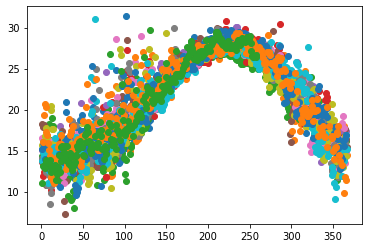

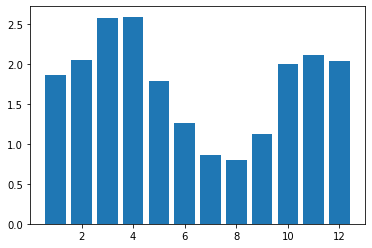

In [200]:
Xy = df
Isr = Xy[Xy["Country"] == "Israel"]
years = set(Isr["Year"])
for year in years:
    Isr_yrly = Isr[Isr["Year"] == year]
    plt.scatter(Isr_yrly["DayOfYear"],Isr_yrly["Temp"])
plt.show()
Isr = Isr.groupby("Month").Temp.agg(["std"])
plt.bar(list(range(1,13)),list(Isr["std"]))
plt.show()

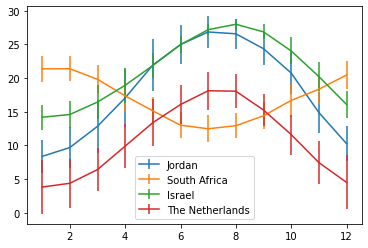

In [238]:
country_month_df = Xy.groupby(['Country','Month']).Temp.agg(['mean','std'])
for country in set(country_month_df.index.droplevel([1])):
    country_df = country_month_df.loc[country]
    mean = country_df["mean"]
    std = country_df["std"]
    plt.errorbar(range(1,13),mean,yerr=std,label = country)
plt.legend()
plt.show()

In [239]:
y_true = np.array([279000, 432000, 326000, 333000, 437400, 555950])
y_pred = np.array([199000.37562541, 452589.25533196, 345267.48129011, 345856.57131275, 563867.1347574, 395102.94362135])
np.mean((y_true-y_pred)**2)

8204349385.967949